2. 'cars.csv' 데이터를 이용하여 회귀모형을 적합하려고 한다. 이는 자동차의 속도(mph)에 따른 제동거리(ft)를 조사한 데이터이다. 다음 물음에 답하여라. (검정에서는 유의수준 $\alpha = 0.05$ 사용)

&nbsp; &nbsp; (1) 이 데이터의 산점도를 그리고 두 변수 사이의 관계를 설명하시오.

* 분석 준비

In [23]:
library(ggplot2)
library(lmtest)

In [265]:
data(cars)
summary(cars)

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

* 산점도

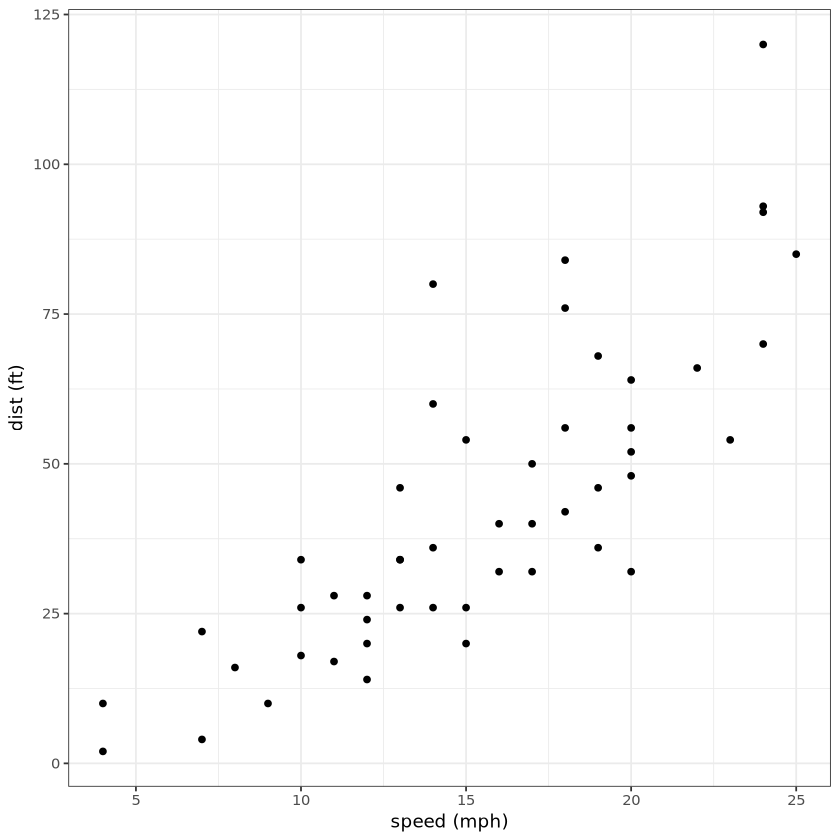

In [33]:
ggplot(cars, aes(speed, dist)) +
 geom_point() +
 theme_bw() + xlab("speed (mph)") + ylab("dist (ft)")

> 자동차의 속도가 증가할수록, 제동거리는 더 커지는 것 같다. 두 변수간 양의 상관관계를 가지고 있되, 비선형의 관계가 존재하는 것 같다.

&nbsp; &nbsp; (2) 최소제곱법에 의한 회귀직선을 적합시키고, 모형 적합 결과를 설명하시오.

In [255]:
model = lm(dist~speed, cars)
summary(model)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


> 추정된 회귀직선은 $\hat{y} = -17.5791 + 3.9324x$이고, 표준편차의 추정값은 15.38이다.
>
> F 통계량에 대한 p-value가 유의수준 $\alpha = 0.05$보다 작아 해당 회귀모형은 유의하다.
>
> 또한 결정계수 $R^2 = 0.6511$로, 해당 회귀모형은 반응변수를 65.11%정도 설명하고 있다.

&nbsp; &nbsp; (3) 데이터의 산점도를 그리고, 추정한 회귀직선을 (1)에서 그린 산점도 위에 그리시오.

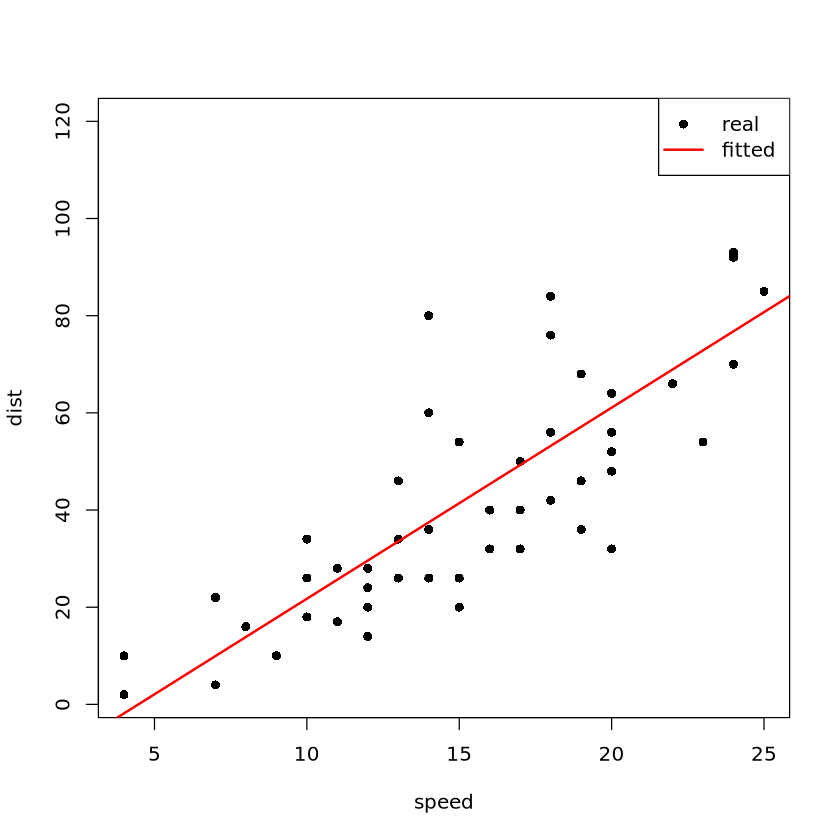

In [59]:
plot(dist~speed, cars, pch = 16)
legend("topright", legend = c("real", "fitted"),
       pch = c(16, NA), lty = c(NA, 1), col = c("black", "red"), lwd = 2)
abline(model, col = "red", lwd = 2)

&nbsp; &nbsp; (4) 분산분석표를 작성하고 회귀직선의 유의 여부를 검정하시오.

In [60]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
speed,1,21185.46,21185.4589,89.56711,1.489836e-12
Residuals,48,11353.52,236.5317,NA,NA


In [214]:
F_statistic = anova(model)[1,4]
p_value = anova(model)[1,5]
n = nrow(cars)

(F_statistic >= qf(0.95, 1, n-2)) & (p_value <= 0.05)

[1] TRUE

`-` 가설

$$H_0 : \beta_1 = 0 ~~ vs. ~~ H_1 : \beta_1 ≠ 0$$

> F검정 결과 유의확률이 유의수준 $\alpha = 0.05$보다 작으므로 귀무가설을 기각하고 대립가설을 수용한다. 즉, 회귀직선은 유의하다.

&nbsp; &nbsp; (5) 결정계수와 상관계수를 구하고 이 둘의 관계를 설명하시오.

In [67]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
speed,1,21185.46,21185.4589,89.56711,1.489836e-12
Residuals,48,11353.52,236.5317,NA,NA


* 결정계수

In [88]:
SST = anova(model)[,2] |> sum()
SSR = anova(model)[1,2]

R_squared = SSR/SST
R_squared  ## summary(model)$r.squared

[1] 0.6510794

* 상관계수

In [81]:
x = cars$speed
y = cars$dist

corr_xy = sum((x - mean(x))*(y - mean(y)))/sqrt(sum((x - mean(x))**2) * sum((y - mean(y))**2))
## cor(x, y)

In [97]:
corr_xy_squared = corr_xy**2
print(cbind(corr_xy, corr_xy_squared))

       corr_xy corr_xy_squared
[1,] 0.8068949       0.6510794


In [98]:
print(cbind(R_squared, corr_xy_squared))

     R_squared corr_xy_squared
[1,] 0.6510794       0.6510794


> 단순선형회귀모형에서 결정계수는 상관계수의 제곱과 동일하다.

&nbsp; &nbsp; (6) $\beta_0, ~ \beta_1$에 대한 개별 회귀계수의 유의성검정을 수행하시오.

In [102]:
summary(model)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-17.579095,6.7584402,-2.601058,1.231882e-02
speed,3.932409,0.4155128,9.463990,1.489836e-12


* $\beta_0$의 유의성 검정

ⅰ) $H_0 : \beta_0 = 0 ~~ vs. ~~ H_1 : \beta_0 ≠ 0$

ⅱ) $\alpha = 0.05$

ⅲ) 검정통계량 $T = \frac{\beta_0 - 0}{\hat{\sigma}_{\hat{\beta_0}}} \sim_{H_0} t(48)$

ⅳ)

In [216]:
t_value = summary(model)$coef[1,3]
abs(t_value) >= qt(0.975, n-2)  ## 양측 검정

[1] TRUE

> p-value가 0.01232로 유의수준 $\alpha = 0.05$보다 작으므로 귀무가설을 기각하고 대립가설을 수용한다. 즉, 추정된 회귀계수 $\hat{\beta_0}$는 주어진 유의수준에서 통계적으로 유의하다.

* $\beta_1$의 유의성 검정

ⅰ) $H_0 : \beta_1 = 0 ~~ vs. ~~ H_1 : \beta_1 ≠ 0$

ⅱ) $\alpha = 0.05$

ⅲ) 검정통계량 $T = \frac{\beta_1 - 0}{\hat{\sigma}_{\hat{\beta_1}}} \sim_{H_0} t(48)$

ⅳ)

In [217]:
t_value = summary(model)$coef[2,3]
abs(t_value) >= qt(0.975, n-2)  ## 양측검정

[1] TRUE

> p-value가 유의수준 $\alpha = 0.05$보다 작으므로 귀무가설을 기각하고 대립가설을 수용한다. 즉, 추정된 회귀계수 $\hat{\beta_1}$은 주어진 유의수준에서 통계적으로 유의하다.

&nbsp; &nbsp; (7) $\beta_0, ~ \beta_1$에 대한 $90\%$ 신뢰구간을 구하시오.

* $\beta_0$ 의 $90\%$ 신뢰구간

In [116]:
summary(model)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-17.579095,6.7584402,-2.601058,1.231882e-02
speed,3.932409,0.4155128,9.463990,1.489836e-12


In [218]:
lwb = (summary(model)$coef[1,1] - qt(0.95, n-2)*summary(model)$coef[1,2]) |> round(3)
upb = (summary(model)$coef[1,1] + qt(0.95, n-2)*summary(model)$coef[1,2]) |> round(3)

print(paste("beta_0의 90% CI : (", lwb, ", ",  upb, ")", sep = ""))

[1] "beta_0의 90% CI : (-28.915, -6.244)"


* $\beta_1$ 의 $90\%$ 신뢰구간

In [219]:
lwb = (summary(model)$coef[2,1] - qt(0.95, n-2)*summary(model)$coef[2,2]) |> round(3)
upb = (summary(model)$coef[2,1] + qt(0.95, n-2)*summary(model)$coef[2,2]) |> round(3)

print(paste("beta_1의 90% CI : (", lwb, ", ",  upb, ")", sep = ""))

[1] "beta_1의 90% CI : (3.236, 4.629)"


* `confint()`함수 이용

In [113]:
confint(model, level = 0.9)

,5 %,95 %
(Intercept),-28.914514,-6.243676
speed,3.235501,4.629317


&nbsp; &nbsp; (8) 다음의 가설검정을 수행하시오.

$$H_0 : \beta_1 = 3 ~~ vs. ~~ H_1 : \beta_1 > 3$$

ⅰ) 검정통계량 T

In [193]:
beta_1 = model$coefficients[2]
se = summary(model)$coef[2,2]

t = (beta_1 - 3)/se
names(t) = NULL
t

[1] 2.243995

ⅱ) 기각역과 p-value

In [220]:
p_value = pt(t, n-2, lower.tail = FALSE)
p_value

[1] 0.01474041

In [195]:
p_value <= 0.05

[1] TRUE

> p-value가 유의수준 $\alpha = 0.05$보다 낮으므로 귀무가설을 기각하고 대립가설을 수용한다. 즉, $\beta_1$은 주어진 유의수준에서 통계적으로 3보다 크다.

&nbsp; &nbsp; (9) 속도가 $18.5$mph인 차량의 평균 제동거리를 예측하고, $95\%$ 신뢰구간을 구하시오

In [222]:
x_0 = data.frame(speed = c(18.5))

predict(model, newdata = x_0, interval = "confidence", level = 0.95)

,fit,lwr,upr
1,55.17047,50.08797,60.25296


In [249]:
## 직접 계산
sig = summary(model)$sigma
x = cars$speed

se_mean = sqrt(summary(model)$sigma**2*(1/n + (x_0 - mean(x))**2/sum((x - mean(x))**2)))
mu_hat = model$coef[1] + model$coef[2]*x_0
lwr = model$coef[1] + model$coef[2]*x_0 - qt(0.975, n-2)*se_mean
upr = model$coef[1] + model$coef[2]*x_0 + qt(0.975, n-2)*se_mean

print(paste("mu hat : ", mu_hat, ", lower bound : ", lwr, ", upper bound : ", upr, sep = ""))

[1] "mu hat : 55.1704671532847, lower bound : 50.0879703876528, upper bound : 60.2529639189166"


&nbsp; &nbsp; (10) 속도가 $18.5$mph인 차량의 개별 제동거리를 예측하고, $95\%$ 신뢰구간을 구하시오

In [207]:
x_0 = data.frame(speed = c(18.5))

predict(model, newdata = x_0, interval = "prediction", level = 0.95)

,fit,lwr,upr
1,55.17047,23.83284,86.5081


In [250]:
## 직접 계산
sig = summary(model)$sigma
x = cars$speed

se_part = sqrt(summary(model)$sigma**2*(1 + 1/n + (x_0 - mean(x))**2/sum((x - mean(x))**2)))
mu_hat = model$coef[1] + model$coef[2]*x_0
lwr = model$coef[1] + model$coef[2]*x_0 - qt(0.975, n-2)*se_part
upr = model$coef[1] + model$coef[2]*x_0 + qt(0.975, n-2)*se_part

print(paste("mu hat : ", mu_hat, ", lower bound : ", lwr, ", upper bound : ", upr, sep = ""))

[1] "mu hat : 55.1704671532847, lower bound : 23.8328362980125, upper bound : 86.5080980085568"


&nbsp; &nbsp; (11) 원점을 지나는 회귀직선을 구하시오.

In [258]:
model2 = lm(dist~0+speed, cars)

In [259]:
summary(model2)


Call:
lm(formula = dist ~ 0 + speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.183 -12.637  -5.455   4.590  50.181 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
speed   2.9091     0.1414   20.58   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.26 on 49 degrees of freedom
Multiple R-squared:  0.8963,	Adjusted R-squared:  0.8942 
F-statistic: 423.5 on 1 and 49 DF,  p-value: < 2.2e-16


> 적합된 회귀직선은 $\hat{y} = 2.9091x$과 같이 나타났다.

&nbsp; &nbsp; (12) 위 회귀직선에서 회귀계수(기울기)의 $90\%$ 신뢰구간을 구하시오.

In [269]:
se_beta = model2$sigma

In [286]:
x = cars$speed

se_beta = sqrt(summary(model2)$sigma**2/sum(x^2))
se_beta

[1] 0.1413686

In [288]:
upr = model2$coef - qt(0.95, n-1)*sqrt(summary(model2)$sigma**2/sum(x^2))
lwr = model2$coef + qt(0.95, n-1)*sqrt(summary(model2)$sigma**2/sum(x^2))

print(paste("회귀계수의 90% CI : (", upr, ", ", lwr, ")", sep = ""))

[1] "회귀계수의 90% CI : (2.67212042854856, 3.14614385932565)"


In [268]:
confint(model2, level = 0.9)

,5 %,95 %
speed,2.67212,3.146144


> 두 수치가 동일한 것을 확인

&nbsp; &nbsp; (13) 원점을 지나는 회귀직선에 대한 분산분석표를 작성하고, 회귀직선의 유의 여부를 검정하시오.

In [289]:
anova(model2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
speed,1,111949.22,111949.2232,423.4682,9.227817e-26
Residuals,49,12953.78,264.3628,NA,NA


`-` 가설

$$H_0 : \beta_1 = 0 ~~ vs. ~~ H_1 : \beta_1 ≠ 0$$

> F검정 결과 유의확률이 유의수준 $\alpha = 0.05$보다 작으므로 귀무가설을 기각하고 대립가설을 수용한다. 즉, 회귀직선은 유의하다.

In [290]:
p_value = anova(model2)[1,5]

p_value <= 0.05

[1] TRUE

&nbsp; &nbsp; (14) 원점을 지나는 회귀직선의 결정계수를 구하시오.

In [292]:
summary(model2)$r.squared

[1] 0.8962893

> 원점을 지나는 회귀직선의 결정계수는 0.8963으로, 일반적인 단순선형회귀에 비하여 결정계수가 높다.

In [294]:
summary(model)$r.squared  ## formal OLS

[1] 0.6510794

&nbsp; &nbsp; (15) 원점을 포함한 회귀직선과 포함하지 않은 회귀직선의 결과를 비교하여라.

In [301]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
speed,1,21185.46,21185.4589,89.56711,1.489836e-12
Residuals,48,11353.52,236.5317,NA,NA


In [302]:
anova(model2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
speed,1,111949.22,111949.2232,423.4682,9.227817e-26
Residuals,49,12953.78,264.3628,NA,NA


`a` : $SST$

In [306]:
SST = anova(model)[,2] |> sum()
SST2 = anova(model2)[,2] |> sum()

print(paste(SST, SST2))

[1] "32538.98 124903"


> 오차제곱합을 정의함에 있어 원점을 포함한 회귀직선의 $SST$가 $\sum_{i=1}^n x_i^2$이기 때문에 그 값이 더 커지게 된다.

`b` : $SSE$

In [310]:
SSE = anova(model)[2,3]
SSE2 = anova(model2)[2,3]

print(paste(SSE, SSE2))

[1] "236.531688564477 264.36279259209"


> 잔차의 경우 제약조건이 하나 줄어든 최소제곱법을 사용하기 때문에 기존보다 커질 수밖에 없게 된다. SSE가 커짐에 따라 자연스럽게 그 표본표준편차도 원점을 포함한 모형에서 더 커지게 된다.

`c` : $R^2$

In [308]:
print(paste(summary(model)$r.squared, summary(model2)$r.squared))

[1] "0.651079380758251 0.896289305805206"


> $R^2 = 1 - \frac{SSE}{SST}$에서 분수 식의 $SST$의 값이 커지는 비율이 더 높아 결정계수의 값은 원점을 지나는 회귀직선이 더 크게 된다.

<span style="background-color:yellow;color:black">**종합**</span>

$SSE, SST, R^2$모두 원점을 포함하는 모형이 더 크다.

&nbsp; &nbsp; (16) 잔차에 대한 산점도를 그리고, 결과를 설명하여라.

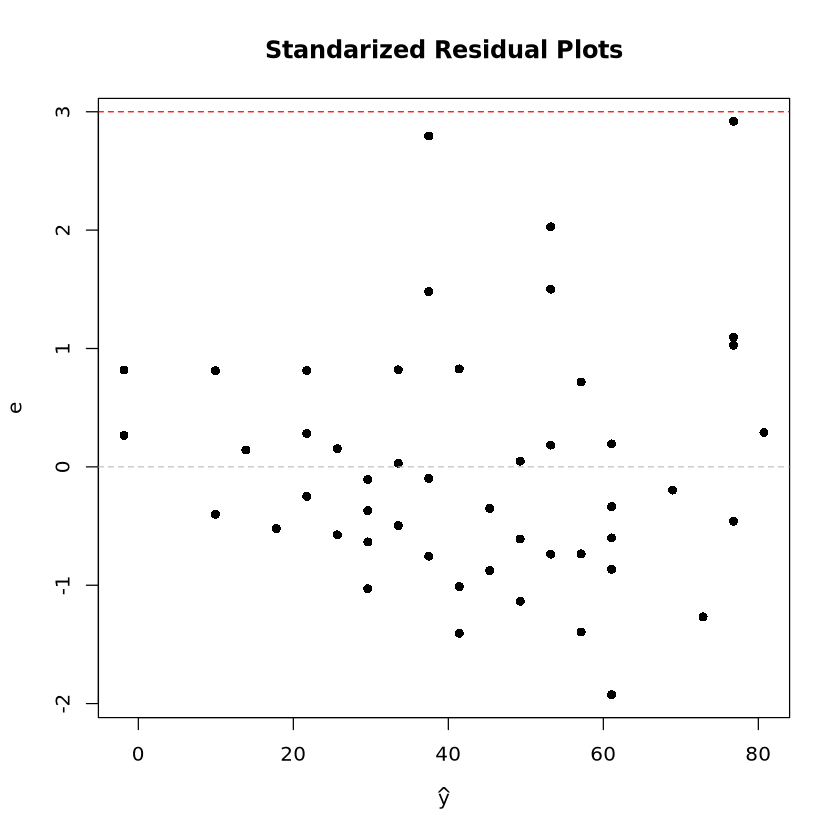

In [327]:
plot(rstandard(model)~predict(model), pch = 16, xlab = expression(hat(y)), ylab = "e", main = "Standarized Residual Plots")
abline(h = c(-3, 0, 3),  lty = 2, col = c("red", "grey", "red"))

1. 그래프가 0을 기준으로 대칭이므로 선형성을 만족한다고 볼 수 있다,
2. $\hat{y}$의 값이 커짐에 따라 잔차의 범위도 같이 커지고 있다. 따라서 등분산성 가정에 위배된다고 말할 수 있다.
3. 표준화된 잔차의 절댓값이 3이 넘어가는 값은 보이지 않고 있다. 하지만 등분산성이 위배되기 때문에 정규성을 가정하기는 어려워보인다.

&nbsp; &nbsp; (17) 잔차에 대한 등분산성 검정을 수행하시오.

> 잔차의 폭이 $\hat{y}(x)$의 값이 커짐에 따라 증가하고 있으므로 등분산성 가정에 위배된다.

&nbsp; &nbsp; (18) 잔차에 대한 히스토그램, QQ plot을 그리고, 정규성 검정을 수행하라.

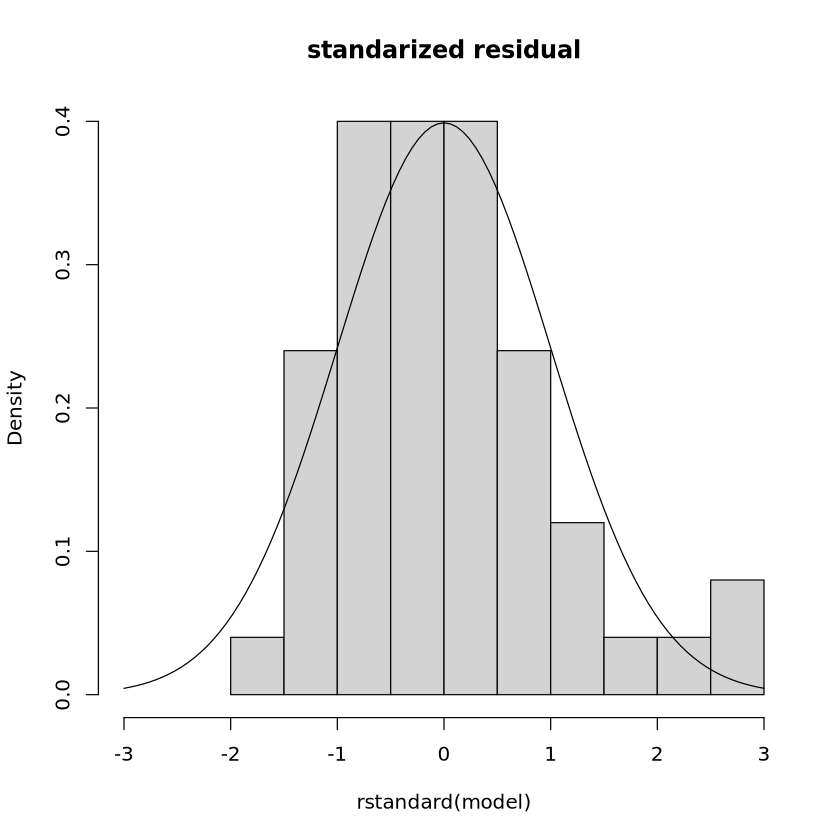

In [354]:
x = cars$speed

hist(rstandard(model), prob = TRUE, xlim = c(-3, 3), main = "standarized residual")
curve(dnorm(x, 0, 1), add = TRUE)

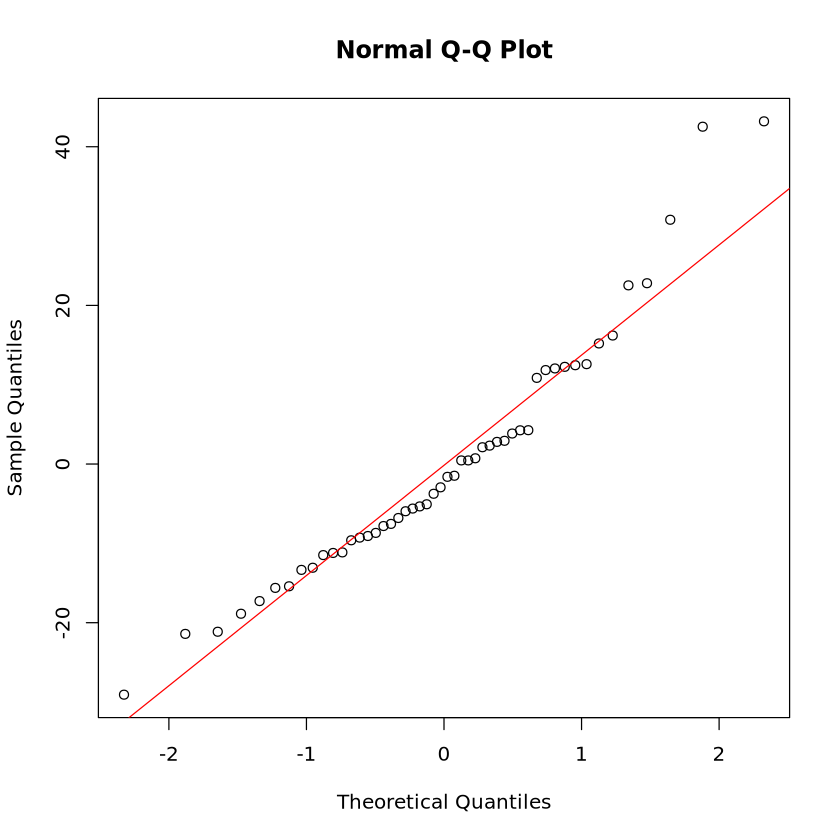

In [360]:
qqnorm(resid(model))
qqline(resid(model), col = "red")

> 큰 값에 대해서 이상치가 많이 존재하는 것을 볼 수 있다. 따라서 정규성을 위배한다고 말할 수 있다.

In [361]:
shapiro.test(resid(model))


	Shapiro-Wilk normality test

data:  resid(model)
W = 0.94509, p-value = 0.02152


가설 "$H_0 : \epsilon \sim Normal ~ Distributions ~~ vs. ~~ H_1 : ~ \sim H_0$"에 대한 정규성 검정 결과, 유의확률이 유의수준 $\alpha = 0.05$보다 작으므로 귀무가설을 기각하고 대립가설을 수용한다. 즉, 잔차는 정규분포를 따르지 않는다.

&nbsp; &nbsp; (19) 잔차에 대한 독립성 검정을 수행하시오.

In [365]:
dwtest(model, alternative = "two.sided")


	Durbin-Watson test

data:  model
DW = 1.6762, p-value = 0.1904
alternative hypothesis: true autocorrelation is not 0


가설 $H_0 : \rho_{\epsilon_{t-1} \epsilon_{t}} = 0 ~~ vs. ~~ H_1 : \rho_{\epsilon_{t-1} \epsilon_{t}} ≠ 0$에 대하여 더빈-왓슨 검정을 실시하였을 때, 유의확률이 0.1904로 주어진 유의수준 $\alpha = 0.05$보다 크기 때문에 귀무가설을 기각할 수 없다. 따라서 잔차의 1차 자기상관은 없다.